**🤝 Grupo 14:** Karina Barrientos - Lucas Brown - Vincent Bustamante

## 🐼 **Pandas Zoo**

El contexto de análisis de datos que elegimos fue el de **visitas a un zoológico**. Para ello, crearemos cinco datasets en los que almacenaremos la siguiente información:

- **Entradas vendidas**
- **Hábitats disponibles para visitar**
- **Shows disponibles para visitar**
- **Relación entre entradas vendidas y visitas a hábitats**, incluyendo el nivel de satisfacción de dichas visitas
- **Relación entre entradas vendidas y visitas a shows**, también con sus respectivos niveles de satisfacción

Elegimos este contexto por el **potencial de análisis** que ofrece, ya que estos centros reciben grandes cantidades de personas. Identificar las **preferencias del público** permitiría **aumentar las ganancias** del zoológico, al manejar la oferta de servicios de acuerdo a estas.



## 📊 **Preguntas de investigación**

- ¿Qué días de la semana hay una mayor frecuencia de visitantes según cada rango etario?
- ¿En qué meses hay una mayor frecuencia de visitantes?
- ¿Existe alguna relación entre el tipo de ambiente de cada hábitat y la frecuencia de visitas?
- ¿La duración de los shows afecta la preferencia de los diferentes rangos etarios?
- ¿En qué horario se concentra la mayor cantidad de visitas?
- ¿La presencia de comercios en los hábitats afecta la satisfacción de los visitantes?
- ¿La posibilidad de consumir alimentos dentro de los hábitats influye en la cantidad de visitas?
- ¿Existe una correlación entre el porcentaje de cupos ocupados en los shows y el nivel de satisfacción de los visitantes?
- ¿Existe una correlación entre el tipo de entrada (VIP) y el nivel de satisfacción de los visitantes?
- ¿La adquisición de entradas VIP se relaciona con la asistencia a shows?
- ¿Existe una correlación entre la cantidad de especies en un hábitat y el número de visitas anuales?

### **Importando todas las librerías utilizadas**

In [3]:
import random
import os
import pandas as pd
import numpy as np
import time
from datetime import datetime, timedelta
import seaborn as sb
import matplotlib.pyplot as plt

### **Generando Datasets**

In [2]:
# Carpeta donde se guardarán todos los DataFrames generados
carpeta_destino = 'zoo_dataset'

# Porcentaje de nulos que se introducirán programaticamente a cada columna
# de todos los datasets
porcentaje_nulos_general = 0.07

In [3]:
# Función para guardar los DataFrames en archivos csv
def guardar_dataset(frame, nombre_archivo_csv):
    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)
        
    nombre_archivo_csv = os.path.join(carpeta_destino, nombre_archivo_csv)
    frame.to_csv(nombre_archivo_csv, encoding="utf-8", na_rep='NULL', index=False)

In [123]:
# --- Función para introducir nulos ---
def introducir_nulos(data_array, porcentaje_nulos):
    """Introduce un porcentaje de valores NaN en una copia del array."""
    if pd.api.types.is_integer_dtype(data_array) and not pd.api.types.is_bool_dtype(data_array):  # No convertir booleanos a float
        data_array_con_nulos = data_array.astype(float)
    else:
        data_array_con_nulos = np.array(data_array, dtype=object)

    num_nulos = int(len(data_array_con_nulos) * porcentaje_nulos)
    if num_nulos > 0:  # Solo si hay nulos que introducir
        indices_nulos = np.random.choice(len(data_array_con_nulos), size=num_nulos, replace=False)
        data_array_con_nulos[indices_nulos] = np.nan
    return data_array_con_nulos

🎟️ **Dataset de Entradas Vendidas**

In [124]:
# Función para generar fechas aleatorias
def fecha_random(inicio, fin, formato, prop):
    tiempo_i = time.mktime(time.strptime(inicio, formato))
    tiempo_f = time.mktime(time.strptime(fin, formato))

    tiempo_p = tiempo_i + prop * (tiempo_i - tiempo_f)

    return time.strftime(formato, time.localtime(tiempo_p))


# Función que devuelve el día de la semana de una fecha dada
def dia_semana(fecha):
    dias = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
    fecha_dt = datetime.strptime(fecha, "%d/%m/%Y")
    return dias[fecha_dt.weekday()]


# Función para generar horas aleatorias
def hora_random():
    hora_inicio = datetime.strptime("09:30", "%H:%M")
    hora_fin = datetime.strptime("17:30", "%H:%M")
    delta = hora_fin - hora_inicio
    segundos_random = random.random() * delta.total_seconds()
    hora_generada = hora_inicio + timedelta(seconds=segundos_random)
    return hora_generada

# Creando diccionario de ventas de entradas
diccionario_ventas = {"VIP": [], "rango_etario": [], "fecha": [], "día_semana": [], "hora_ingreso": []}


# Rellenando diccionario de ventas de entradas
for _ in range(600):
    definir_nulo = random.randint(1, 400)
    fecha = ""
    if definir_nulo in range(1, 41):
        diccionario_ventas["VIP"].append(None)
    else:
        diccionario_ventas["VIP"].append(random.choice([True, False]))
    if definir_nulo in range(41, 81):
        diccionario_ventas["rango_etario"].append(None)
    else:
        diccionario_ventas["rango_etario"].append(random.choice(["Niño", "Adulto", "Adulto Mayor"]))
    if definir_nulo in range(81, 121):
        diccionario_ventas["fecha"].append(None)
    else:
        fecha = fecha_random("01/01/2025", "20/05/2025", "%d/%m/%Y", random.random())
        diccionario_ventas["fecha"].append(fecha)
    if definir_nulo in range(121, 161) or fecha == "":
        diccionario_ventas["día_semana"].append(None)
    else:
        diccionario_ventas["día_semana"].append(dia_semana(fecha))
    if definir_nulo in range(161, 201):
        diccionario_ventas["hora_ingreso"].append(None)
    else:
        diccionario_ventas["hora_ingreso"].append(hora_random().strftime("%H:%M"))

# Creando DataFrame a partir del diccionario de ventas de entradas
frame = pd.DataFrame(diccionario_ventas, columns=diccionario_ventas.keys())
frame.index.name = "ID_entrada"

# Guardando el DataFrame en archivo CSV
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)
        
nombre_archivo_csv = os.path.join(carpeta_destino, 'entradas_zoo_sucio_generado.csv')
frame.to_csv(nombre_archivo_csv, encoding="utf-8", na_rep='NULL')

🏞️ **Dataset de Hábitats**

In [125]:
# Datos necesarios para generar DataFrame
total_habitats = 18

habitat_ids = [
    "H001", "H002", "H003", "H004", "H005", "H006", "H007", "H008",
    "H009", "H010", "H011", "H012", "H013", "H014", "H015", "H016",
    "H017", "H018"
]

nombres_habitats = [
    "Selva Tropical",
    "Sabana Dorada",
    "Caverna de los Murciélagos",
    "Pantano Misterioso",
    "Bosque Templado",
    "Rincón de los Reptiles",
    "Altas Cumbres",
    "Mares Profundos",
    "Isla de los Primates",
    "Valle del Tigre",
    "Estepa Salvaje",
    "Refugio del Panda",
    "Jardín de las Mariposas",
    "Desierto Rojo",
    "Granja Interactiva",
    "La Antártida Viva",
    "Bosque de Koalas",
    "Zona Nocturna"
]

tipos_ambientes = [
    "Cerrado", "Abierto", "Mixto"
]

# Generando combinaciones aleatorias de datos para cada columna
cantidad_especies = np.random.randint(1, 5, size=total_habitats)

ambientes = np.random.choice(tipos_ambientes, size=total_habitats)

permite_alimentos = np.random.choice([True, False], size=total_habitats)

comercio = np.random.choice([True, False], size=total_habitats)

aforo = np.random.randint(30, 50, size=total_habitats)

# Se decidió no agregar nulos a esta tabla debido a que es muy pequeña

# Agregando nulos a cada columna
# nombres_habitats_con_nulos = introducir_nulos(nombres_habitats, porcentaje_nulos_general)
# cantidad_especies_con_nulos = introducir_nulos(cantidad_especies, porcentaje_nulos_general)
# tipo_ambiente_con_nulos = introducir_nulos(ambientes, porcentaje_nulos_general)
# permite_alimentos_con_nulos = introducir_nulos(permite_alimentos, porcentaje_nulos_general)
# comercio_con_nulos = introducir_nulos(comercio, porcentaje_nulos_general)
# aforo_con_nulos = introducir_nulos(aforo, porcentaje_nulos_general)

# Creando DataFrame a partir de los datos generados
habitats = pd.DataFrame({
    'ID_habitat': habitat_ids,
    'nombre_habitat': nombres_habitats,
    'cantidad_especies': cantidad_especies,
    'tipo_ambiente': ambientes,
    'permite_alimentos': permite_alimentos,
    'comercio': comercio,
    'aforo': aforo
})

# Guardando DataFrame en archivo CSV
guardar_dataset(habitats, 'habitats_generado.csv')


🦁 **Dataset de Shows**

In [ ]:
# Datos necesarios para generar DataFrame
total_shows = 18

shows_ids = [
    "S001", "S002", "S003", "S004", "S005", "S006", "S007", "S008",
    "S009", "S010", "S011", "S012", "S013", "S014", "S015", "S016",
    "S017", "S018"
]

nombres_shows = [
    "Aventuras Salvajes",
    "El Rugido de la Selva",
    "Vuelo Majestuoso",
    "Guardianes del Reino Animal",
    "Entre Garras y Plumas",
    "Reptiles al Descubierto",
    "Safari Sonoro",
    "Zooluminación Nocturna",
    "Amigos del Pantano",
    "Gigantes de la Sabana",
    "Baile de las Aves",
    "Pequeños Exploradores",
    "Magia Marina",
    "Caminata con Canguros",
    "El Misterio del Amazonas",
    "Bestias del Crepúsculo",
    "Manada en Movimiento",
    "Historias del Zoo"
]

tipos_ambientes = [
    "Cerrado", "Abierto", "Mixto"
]

# Generando combinaciones aleatorias de datos para cada columna
cupos_totales = np.random.randint(30, 51, size=total_shows)

cupos_ocupados = np.array([np.random.randint(0, total + 1) for total in cupos_totales])

ambientes = np.random.choice(tipos_ambientes, size=total_shows)

duracion = np.random.randint(30, 121, size=total_shows)

# Se decidió no agregar nulos a esta tabla debido a que es muy pequeña

# Agregar nulos a cada columna
# nombres_shows_con_nulos = introducir_nulos(nombres_shows, porcentaje_nulos_general)
# cupos_totales_con_nulos = introducir_nulos(cupos_totales, porcentaje_nulos_general)
# cupos_ocupados_con_nulos = introducir_nulos(cupos_ocupados, porcentaje_nulos_general)
# ambientes_con_nulos = introducir_nulos(ambientes, porcentaje_nulos_general)
# duracion_con_nulos = introducir_nulos(duracion, porcentaje_nulos_general)

# Creando DataFrame a partir de los datos generados
shows = pd.DataFrame({
    'ID_show': shows_ids,
    'nombre_show': nombres_shows,
    'cupos_totales': cupos_totales,
    'cupos_ocupados': cupos_ocupados,
    'tipo_ambiente': ambientes,
    'duracion': duracion
})

# Guardando DataFrame en archivo CSV
guardar_dataset(shows, "shows_generado.csv")

🔗🦓 **Dataset: Relación entre Entradas y Hábitats Visitados**

In [127]:
# Este es el total de filas que tendrá esta tabla
total_visitas_habitats = 800

# Este es el rango de IDs en el que se generaron las entradas.
# Debido a que el foco en este ítem del proyecto es generar datos sintéticos,
# se consideró conveniente no leer las tablas generadas anteriormente para 
# obtener los IDs, sino simplemente usar el mismo rango numérico.
min_id_entrada = 0
max_id_entrada = 599

# Definir las probabilidades de selección para cada hábitat
habitat_probabilities = [
    0.05, 0.12, 0.08, 0.03, 0.06, 0.04, 0.05, 0.04,
    0.03, 0.02, 0.07, 0.03, 0.02, 0.10, 0.03, 0.04,
    0.04, 0.15
]


# Validar que la suma de las probabilidades sea igual a 1.0
if not np.isclose(sum(habitat_probabilities), 1.0):
    raise ValueError(f"La suma de las probabilidades de los hábitats debe ser 1.0. Suma actual: {sum(habitat_probabilities)}")

# Validar que la cantidad de IDs coincida con la cantidad de probabilidades
if len(habitat_ids) != len(habitat_probabilities):
    raise ValueError("La cantidad de IDs de hábitat debe coincidir con la cantidad de probabilidades.")


# Generar combinaciones aleatorias de datos para cada columna
id_habitat_lista_original = np.random.choice(
    habitat_ids,
    size=total_visitas_habitats,
    p=habitat_probabilities
)
id_entrada_lista_original = np.random.randint(min_id_entrada, max_id_entrada + 1, size=total_visitas_habitats)
satisfaccion_lista_original = np.random.randint(1, 6, size=total_visitas_habitats)

# Agregar nulos a cada columna
id_habitat_con_nulos = introducir_nulos(id_habitat_lista_original, porcentaje_nulos_general)
id_entrada_con_nulos = introducir_nulos(id_entrada_lista_original, porcentaje_nulos_general)
satisfaccion_con_nulos = introducir_nulos(satisfaccion_lista_original, porcentaje_nulos_general)


# Crear DataFrame a partir de los datos generados
df_visitas_habitats = pd.DataFrame({
    'ID_entrada': id_entrada_con_nulos,
    'ID_habitat': id_habitat_con_nulos,
    'satisfaccion': satisfaccion_con_nulos
})

# Ordenar por ID_entrada (Pandas por defecto pone los NULL al final al ordenar)
df_visitas_habitats = df_visitas_habitats.sort_values(by='ID_entrada').reset_index(drop=True)

# Guardar DataFrame en archivo CSV
guardar_dataset(df_visitas_habitats, "visitas_habitats_sucio_generado.csv")

🔗🦭 **Dataset: Relación entre Entradas y Shows Visitados**

In [128]:
total_visitas_shows = 800

# Generar combinaciones aleatorias de datos para cada columna
id_shows_lista_original = np.random.choice(
    shows_ids,
    size=total_visitas_shows,
)
id_entrada_lista_original = np.random.randint(min_id_entrada, max_id_entrada + 1, size=total_visitas_shows)
satisfaccion_lista_original = np.random.randint(1, 6, size=total_visitas_shows)

# Agregar nulos a cada columna
id_shows_con_nulos = introducir_nulos(id_shows_lista_original, porcentaje_nulos_general)
id_entrada_con_nulos = introducir_nulos(id_entrada_lista_original, porcentaje_nulos_general)
satisfaccion_con_nulos = introducir_nulos(satisfaccion_lista_original, porcentaje_nulos_general)


# Crear DataFrame a partir de los datos generados
df_visitas_shows = pd.DataFrame({
    'ID_entrada': id_entrada_con_nulos,
    'ID_show': id_shows_con_nulos,
    'satisfaccion': satisfaccion_con_nulos
})

# Ordenar por ID_entrada (Pandas por defecto pone los NULL al final al ordenar)
df_visitas_shows = df_visitas_shows.sort_values(by='ID_entrada').reset_index(drop=True)

# Guardar DataFrame en archivo CSV
guardar_dataset(df_visitas_shows, 'visitas_shows_sucio_generado.csv')

### **Limpieza de datasets**

In [129]:
# Comenzamos limpiando la tabla de entidad que se encuentra en 
# entradas_zoo_sucio_generado.csv y obtenemos una lista con los
# índices que se eliminan para luego eliminarlos de las tablas
# de relación

# Rutas a los archivos CSV
ruta_entradas = os.path.join('zoo_dataset', 'entradas_zoo_sucio_generado.csv')
ruta_visitas_habitats = os.path.join('zoo_dataset', 'visitas_habitats_sucio_generado.csv')
ruta_visitas_shows = os.path.join('zoo_dataset', 'visitas_shows_sucio_generado.csv')

# Leer archivos CSV
entradas = pd.read_csv(ruta_entradas)
visitas_habitats = pd.read_csv(ruta_visitas_habitats)
visitas_shows = pd.read_csv(ruta_visitas_shows)

In [130]:
# Usamos la función info para obtener más detalles acerca de los valores NaN existentes
entradas.info()
visitas_habitats.info()
visitas_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID_entrada    600 non-null    int64 
 1   VIP           547 non-null    object
 2   rango_etario  548 non-null    object
 3   fecha         528 non-null    object
 4   día_semana    454 non-null    object
 5   hora_ingreso  524 non-null    object
dtypes: int64(1), object(5)
memory usage: 28.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_entrada    744 non-null    float64
 1   ID_habitat    744 non-null    object 
 2   satisfaccion  744 non-null    float64
dtypes: float64(2), object(1)
memory usage: 18.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column        Non-Null Count

In [131]:
#Revisamos que filas contienen NaN y hacemos una lista de 
# sus índices

# Filas con NaN
filas_con_nan = entradas[entradas.isna().any(axis=1)]

# IDs de esas filas
ids_entradas_eliminadas = filas_con_nan['ID_entrada'].tolist()

# Eliminamos todos los NaN en el DataFrame de entradas y generamos 
# una copia del DataFrame el cual guardamos en la variable 
# entradas_sin_NaN sin modificar el DataFrame original

# DataFrame limpio
entradas_sin_NaN = entradas.dropna()

print("IDs eliminados:", ids_entradas_eliminadas)
display(entradas_sin_NaN)


IDs eliminados: [0, 1, 5, 6, 12, 14, 16, 19, 20, 21, 23, 24, 25, 26, 28, 29, 34, 40, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56, 58, 59, 60, 62, 64, 65, 66, 67, 69, 70, 73, 75, 76, 77, 78, 80, 83, 84, 85, 87, 90, 91, 92, 93, 95, 97, 98, 101, 105, 110, 113, 117, 119, 121, 122, 123, 126, 127, 131, 133, 134, 136, 138, 143, 144, 145, 146, 147, 149, 151, 155, 156, 163, 165, 166, 168, 169, 171, 172, 173, 175, 178, 181, 182, 183, 184, 187, 188, 192, 193, 198, 199, 200, 203, 204, 208, 211, 212, 213, 215, 216, 219, 220, 222, 223, 224, 227, 228, 229, 230, 233, 235, 236, 237, 238, 239, 241, 243, 244, 246, 247, 249, 250, 251, 252, 255, 257, 258, 259, 261, 262, 267, 269, 270, 271, 272, 273, 277, 278, 280, 281, 284, 288, 291, 295, 297, 298, 299, 300, 303, 304, 305, 306, 307, 308, 309, 311, 313, 314, 315, 316, 320, 321, 322, 325, 326, 329, 330, 331, 332, 333, 336, 339, 340, 343, 344, 345, 347, 350, 353, 354, 355, 356, 357, 359, 361, 362, 363, 364, 366, 368, 369, 370, 374, 375, 380, 381, 383, 384,

,ID_entrada,VIP,rango_etario,fecha,día_semana,hora_ingreso
2,2,True,Niño,27/08/2024,Martes,14:27
3,3,True,Adulto Mayor,25/12/2024,Miércoles,16:39
4,4,True,Adulto Mayor,01/12/2024,Domingo,11:52
7,7,True,Adulto Mayor,20/09/2024,Viernes,11:54
8,8,True,Adulto Mayor,04/10/2024,Viernes,09:48
...,...,...,...,...,...,...
587,587,False,Adulto,03/12/2024,Martes,10:57
588,588,False,Adulto Mayor,02/09/2024,Lunes,13:55
591,591,True,Adulto Mayor,17/11/2024,Domingo,15:24
595,595,False,Adulto Mayor,28/10/2024,Lunes,11:36


In [132]:
# Eliminamos todas las filas que contienen claves foraneas
# que ya no existen sus respectivas claves primarias
visitas_habitats_sin_ids_eliminados = visitas_habitats[~visitas_habitats['ID_entrada'].isin(ids_entradas_eliminadas)]
visitas_shows_sin_ids_eliminados = visitas_shows[~visitas_shows['ID_entrada'].isin(ids_entradas_eliminadas)]

display(visitas_habitats_sin_ids_eliminados)
display(visitas_shows_sin_ids_eliminados)

,ID_entrada,ID_habitat,satisfaccion
2,2.0,H018,4.0
3,3.0,H018,1.0
4,3.0,H001,4.0
5,4.0,H018,4.0
6,4.0,H013,1.0
...,...,...,...
795,NaN,H016,3.0
796,NaN,H011,3.0
797,NaN,H006,3.0
798,NaN,H018,4.0


,ID_entrada,ID_show,satisfaccion
3,2.0,S014,3.0
4,2.0,S015,4.0
5,8.0,S017,2.0
6,10.0,S015,4.0
7,11.0,S004,2.0
...,...,...,...
795,NaN,S013,4.0
796,NaN,S009,4.0
797,NaN,S006,4.0
798,NaN,S016,5.0


In [133]:
# Limpiamos los DataFrames de visitas a hábitats y visitas a shows
# En este caso solo eliminamos las filas que contengan NaN en las 
# columnas de IDs, debido a que si la columna de satisfacción contiene NaN
# se asume que el visitante no contestó la encuesta y esto también 
# se considera información
visitas_habitats_limpio = visitas_habitats_sin_ids_eliminados.dropna(subset=['ID_entrada','ID_habitat'])
visitas_shows_limpio = visitas_shows_sin_ids_eliminados.dropna(subset=['ID_entrada','ID_show'])

display(visitas_habitats_limpio)
display(visitas_shows_limpio)

,ID_entrada,ID_habitat,satisfaccion
2,2.0,H018,4.0
3,3.0,H018,1.0
4,3.0,H001,4.0
5,4.0,H018,4.0
6,4.0,H013,1.0
...,...,...,...
727,588.0,H002,3.0
728,588.0,H016,5.0
732,591.0,H003,4.0
739,595.0,H007,3.0


,ID_entrada,ID_show,satisfaccion
3,2.0,S014,3.0
4,2.0,S015,4.0
5,8.0,S017,2.0
6,10.0,S015,4.0
7,11.0,S004,2.0
...,...,...,...
733,587.0,S002,5.0
735,591.0,S003,5.0
736,591.0,S018,1.0
737,591.0,S015,1.0


In [134]:
# Guardamos los datasets limpios

guardar_dataset(entradas_sin_NaN, 'entradas_zoo_limpio.csv')
guardar_dataset(visitas_habitats_limpio, 'visitas_habitats_limpio.csv')
guardar_dataset(visitas_shows_limpio, 'visitas_shows_limpio.csv')

# **📶 Vizualización de Datos**

Seaborn

In [4]:
# Primero se cargan los datasets desde archivos CSV utilizando pandas:
entradas = pd.read_csv("./zoo_dataset/entradas_zoo_limpio.csv", encoding="utf-8")
habitats = pd.read_csv("./zoo_dataset/habitats_generado.csv", encoding="utf-8")
entradas_habitats = pd.read_csv("./zoo_dataset/visitas_habitats_limpio.csv", encoding="utf-8")
entradas_shows = pd.read_csv("./zoo_dataset/visitas_shows_limpio.csv", encoding="utf-8")
shows = pd.read_csv("./zoo_dataset/shows_generado.csv", encoding="utf-8")

### Pregunta 1: ¿Qué días de la semana hay una mayor frecuencia de visitantes según cada rango etario?
Para responder esta pregunta es necesario filtrar por cada Rango Etario, y hacer un conteo en base a los días de la semana. 

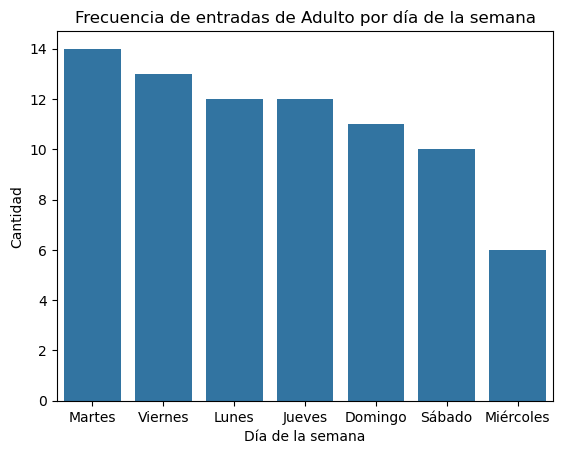

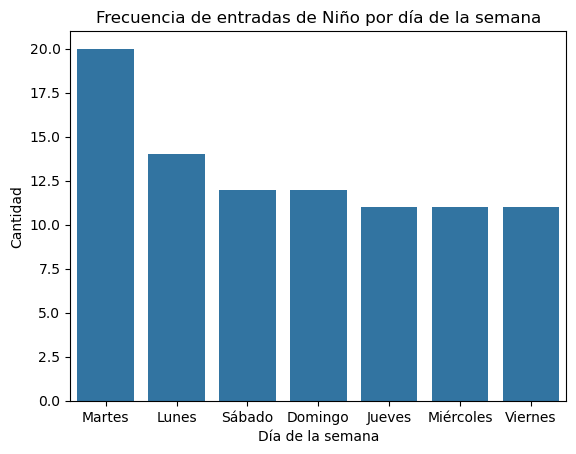

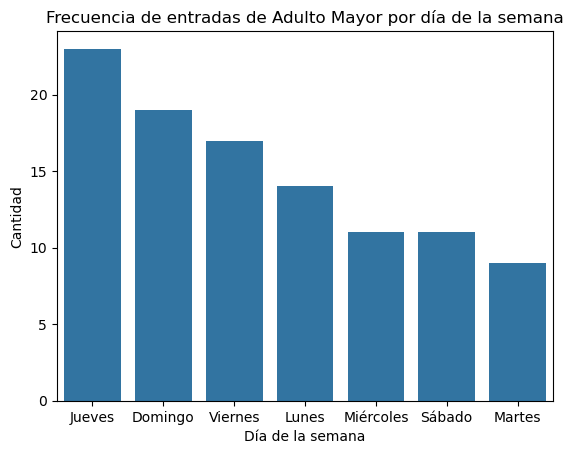

In [5]:
# Responder pregunta 1: ¿Qué días de la semana hay una mayor frecuencia de visitantes según cada rango etario?
def generar_grafico_1(dataframe, rango_etario_arg):
    entradas_filtradas = dataframe[dataframe["rango_etario"] == rango_etario_arg]
    entradas_dias = entradas_filtradas["día_semana"].value_counts().reset_index()

    plt.figure()
    sb.barplot(x="día_semana", y="count", data=entradas_dias)
    plt.title(f"Frecuencia de entradas de {rango_etario_arg} por día de la semana")
    plt.xlabel("Día de la semana")
    plt.ylabel("Cantidad")


rango_etarios = ["Adulto", "Niño", "Adulto Mayor"]
for edad in rango_etarios:
    generar_grafico_1(entradas, edad)

plt.show()

Como se puede apreciar en las gráficas, los Rangos Etarios prefieren los siguientes días:
- Adultos: Martes y Viernes
- Niños: Martes y Lunes
- Adultos mayores: Jueves y Domingo

### Pregunta 2: ¿En qué meses hay una mayor frecuencia de visitantes?
Para responder la pregunta es necesario extraer el mes de las fechas de cada una de las entradas vendidas, para de esta forma realizar un conteo de cada entrada según su mes.

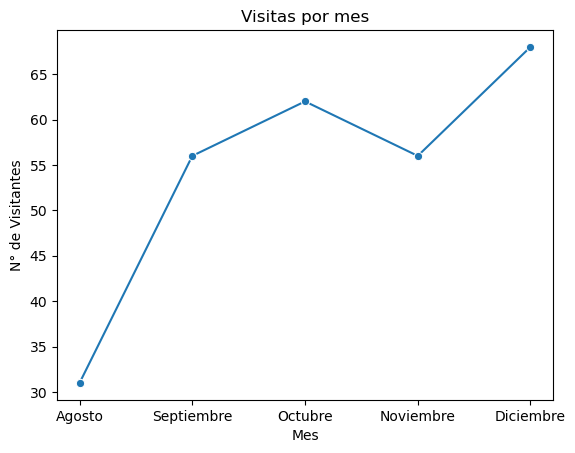

In [6]:
# Pregunta 2: ¿En qué meses hay una mayor frecuencia de visitantes?
entradas_fecha = entradas["fecha"].str.split("/", expand=True)
entradas_fecha.columns = ["día", "mes", "año"]
conteo_mes = entradas_fecha["mes"].value_counts().reset_index()

meses_orden = {
    "01": "Enero", "02": "Febrero", "03": "Marzo", "04": "Abril",
    "05": "Mayo", "06": "Junio", "07": "Julio", "08": "Agosto",
    "09": "Septiembre", "10": "Octubre", "11": "Noviembre", "12": "Diciembre"
}

conteo_mes["mes_nombre"] = conteo_mes["mes"].map(meses_orden)
conteo_mes["mes_num"] = conteo_mes["mes"].astype(int)
conteo_mes = conteo_mes.sort_values("mes_num")

plt.figure()
sb.lineplot(x="mes_nombre", y="count", data=conteo_mes, marker="o")
plt.title("Visitas por mes")
plt.xlabel("Mes")
plt.ylabel("N° de Visitantes")

plt.show()

En la gráfica se logra notar un claro aumento a medida que la fecha se va acercando al mes de Diciembre.

### Pregunta 3: ¿Existe alguna relación entre el tipo de ambiente de cada hábitat y la frecuencia de visitas?


,nombre_habitat,tipo_ambiente
0,Selva Tropical,Abierto
1,Sabana Dorada,Cerrado
2,Caverna de los Murciélagos,Cerrado
3,Pantano Misterioso,Mixto
4,Bosque Templado,Cerrado
5,Rincón de los Reptiles,Cerrado
6,Altas Cumbres,Cerrado
7,Mares Profundos,Abierto
8,Isla de los Primates,Abierto
9,Valle del Tigre,Cerrado


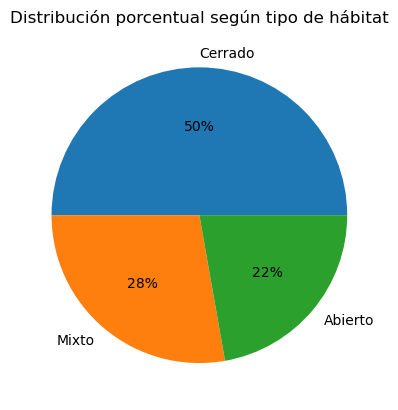

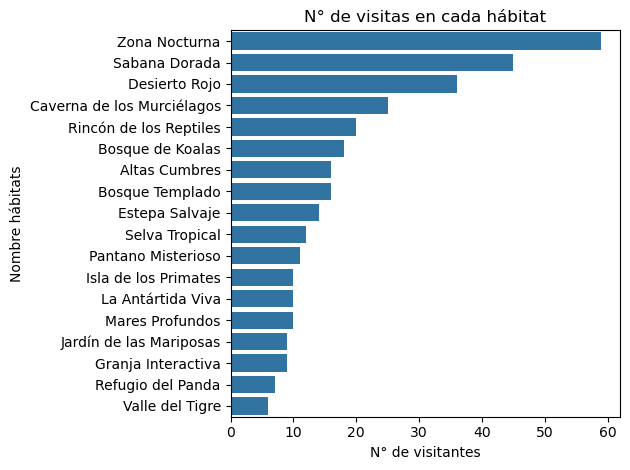

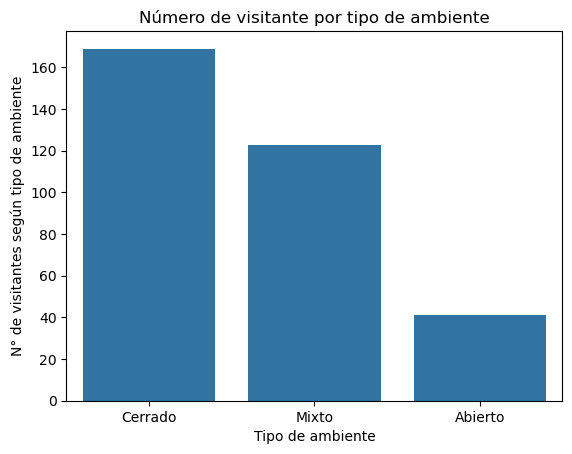

In [5]:
# Pregunta 3: ¿Existe alguna relación entre el tipo de ambiente de cada hábitat y la frecuencia de visitas?
left_join_entradas_habitats = pd.merge(entradas_habitats, habitats, how="left", on="ID_habitat")

display(habitats[["nombre_habitat", "tipo_ambiente"]])

tipo_habitats = habitats[["nombre_habitat", "tipo_ambiente"]]

conteo_tipo_habitats = tipo_habitats["tipo_ambiente"].value_counts().reset_index()

plt.figure()
plt.pie(conteo_tipo_habitats["count"], labels=conteo_tipo_habitats["tipo_ambiente"], autopct='%.0f%%')
plt.title("Distribución porcentual según tipo de hábitat")

conteo_tipo_habitats_entradas = left_join_entradas_habitats["nombre_habitat"].value_counts().reset_index()
plt.figure()
sb.barplot(x="count", y="nombre_habitat", data=conteo_tipo_habitats_entradas)
plt.title("N° de visitas en cada hábitat")
plt.xlabel("N° de visitantes")
plt.ylabel("Nombre hábitats")
plt.tight_layout()

conteo_entradas = left_join_entradas_habitats["tipo_ambiente"].value_counts().reset_index()

plt.figure()
sb.barplot(x="tipo_ambiente", y="count", data=conteo_entradas)
plt.title("Número de visitante por tipo de ambiente")
plt.xlabel("Tipo de ambiente")
plt.ylabel("N° de visitantes según tipo de ambiente")

plt.show()

En la primera tabla se pueden reconocer cuales son los habitats con sus respectivos tipos de ambiente. 
   
Luego, por medio de una gráfica de torta se aprecian la cantidad de habitats de cada tipo en forma porcentual, predominando el ambiente cerrado. Pero los dos habitats más visitados en el periodo de Agosto a Septiembe, son de tipo mixto, siendo estos la Zona Nocturna y la Sabana Dorada.  
  
Para tener una mejor visualización de la situación, pero solo enfocándonos en la frecuencia de visitas de los habitats basados en su tipo de ambiente se ofrece el último gráfico de barras.  
  
Se logra notar una preferencia de los visitantes por los ambientes cerrados y mixtos en este caso.  
  
Esto puede deberse a factores climatológicos percibidos en las fechas de las que se tiene registro las entradas, o por una cuestión de una mayor cantidad de habitats cerrados o mixtos desde una perspectiva porcentual, con respecto a los habitats abiertos.  
  
Aún asi con la información presente se puede concluir que, efectivamente, el tipo de ambiente afecta a la frecuencia de visitas de los habitats.

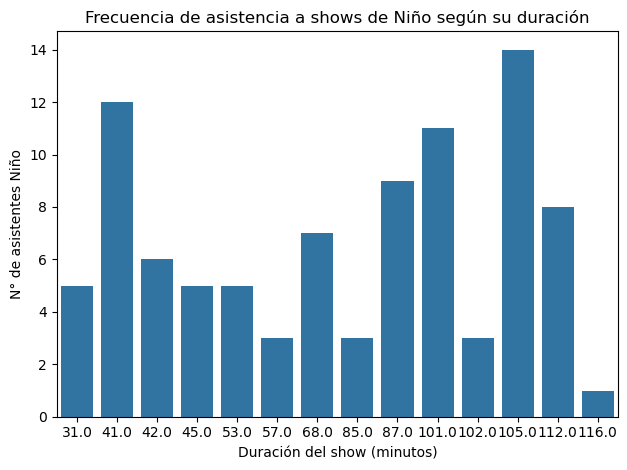

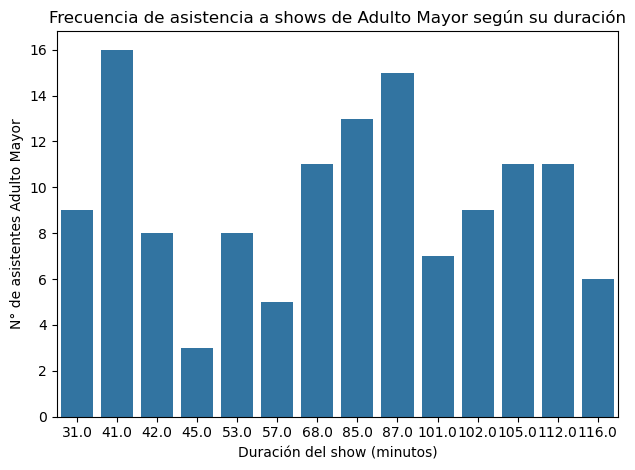

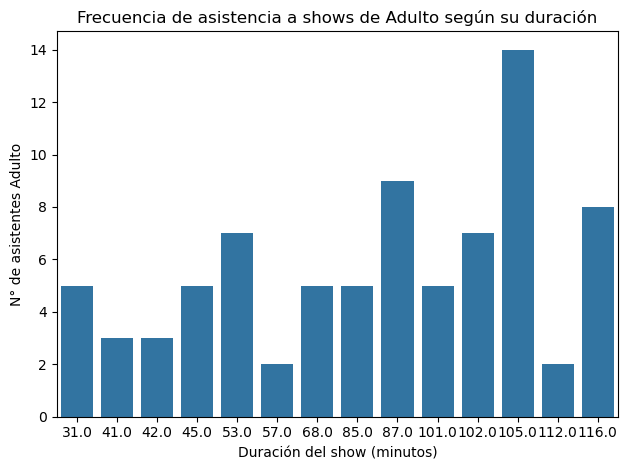

In [13]:
# Pregunta 4: ¿La duración de los shows afecta la preferencia de los diferentes rangos etarios?
left_join_entradas_shows = pd.merge(entradas_shows, shows, how="left", on="ID_show")

left_join_entradas_shows_rango_etario = pd.merge(left_join_entradas_shows, entradas[["ID_entrada", "rango_etario"]], how="left", on="ID_entrada")

for rango in left_join_entradas_shows_rango_etario["rango_etario"].unique():
    filtro_edad_actual = left_join_entradas_shows_rango_etario[left_join_entradas_shows_rango_etario["rango_etario"] == rango]
    asistencia_segun_duracion = filtro_edad_actual["duracion"].value_counts().reset_index().sort_values(by="duracion")
    plt.figure()
    sb.barplot(x="duracion", y="count", data=asistencia_segun_duracion)
    plt.title(f"Frecuencia de asistencia a shows de {rango} según su duración")
    plt.xlabel("Duración del show (minutos)")
    plt.ylabel(f"N° de asistentes {rango}")
    plt.tight_layout()

plt.show()

Niños: En el caso de la preferencia del rango etario de los niños, no hay una distribución de frecuencias que indique una preferencia significativa debido a la duración del show, ya que existen cantidades de asistentes niños similares, tanto en el rango de los shows mas cortos a los de mediana duración, como en el rango de los shows de mediana a alta duración. Esto puede deberse a una simple preferencia personal de cada individuo por su shows favoritos.
  
Adultos Mayores: Algo similar al caso del rango etario de Niños sucede con los Adultos Mayores, pero se puede ver una pequeña tendencia a los shows de mediana a alta duración, siendo la excepción el show correspondiente con una duraciónde 41 segundos.

Adultos: En este caso, si se logra diferenciar una tendencia más notoria hacia los shows de mayor duración. Puede deberse a que los shows poseen un costo adicional a la entrada estandar, o el querer aprovechar al máximo las ventajas de las entradas VIP.

### Pregunta 5: ¿En qué horario se concentra la mayor cantidad de visitas?
Para esto es necesario agregar una columna que se llame hora_decimal, en donde se hará la conversión del formato de hora_ingreso de cada entrada, a un formato decimal, para construir el histograma correspondiente. 

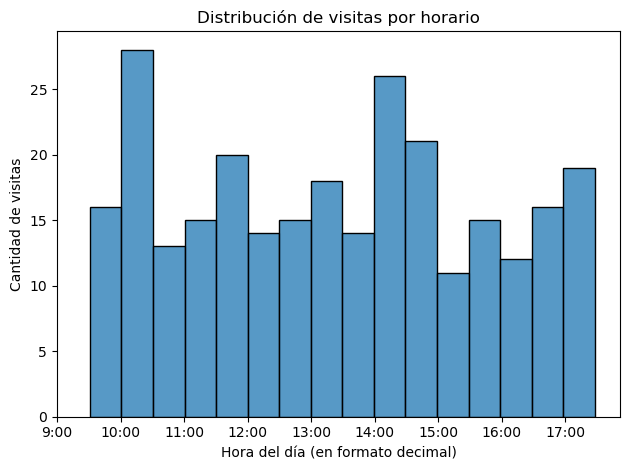

In [14]:
# Pregunta 5: ¿En qué horario se concentra la mayor cantidad de visitas?
def hora_a_minutos(hora_str):
    try:
        t = datetime.strptime(hora_str, "%H:%M")
        return t.hour + t.minute / 60
    except:
        return None


entradas["hora_decimal"] = entradas["hora_ingreso"].apply(hora_a_minutos)

plt.figure()
sb.histplot(data=entradas, x="hora_decimal", bins=16, kde=False)
plt.title("Distribución de visitas por horario")
plt.xlabel("Hora del día (en formato decimal)")
plt.ylabel("Cantidad de visitas")
plt.xticks(ticks=range(9, 18), labels=[f"{h}:00" for h in range(9, 18)])
plt.tight_layout()

plt.show()

Como se puede apreciar, existe una relativa frecuencia constante de personas durante el día, pero los picks más notorios suceden entre las 10:00 y 10:30, poco después del horario de apertura, y en el horario cercano al término del almuerzo, desde las 14:00 a las 14:30.

### Pregunta 6: ¿La presencia de comercios en los hábitats afecta la satisfacción de los visitantes?
Para esta pregunta haremos un filtro de la satisfacción del cliente en base a si existe o no comercio en el habitat, y reflejar mediante un gráfico de torta los porcentajes de cada puntuación dada.

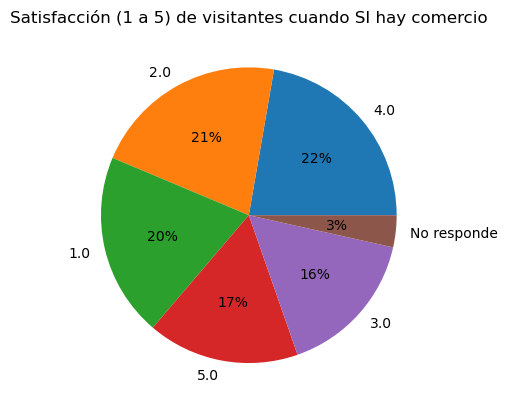

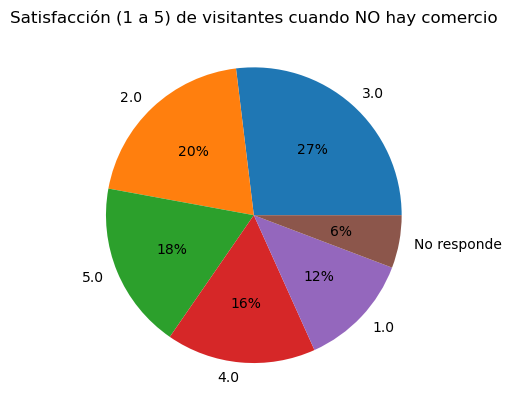

In [6]:
# Pregunta 6: ¿La presencia de comercios en los hábitats afecta la satisfacción de los visitantes?
for comercio in left_join_entradas_habitats["comercio"].unique():
    filtro_comercio = left_join_entradas_habitats[left_join_entradas_habitats["comercio"] == comercio].copy()
    filtro_comercio["satisfaccion"] = filtro_comercio["satisfaccion"].fillna("No responde")

    conteo_satisfaccion = filtro_comercio["satisfaccion"].value_counts().reset_index()
    plt.figure()
    plt.pie(conteo_satisfaccion["count"], labels=conteo_satisfaccion["satisfaccion"], autopct='%.0f%%')
    titulo_comercio = "SI" if comercio else "NO"
    plt.title(f"Satisfacción (1 a 5) de visitantes cuando {titulo_comercio} hay comercio")

plt.show()

En el caso de que SI haya comercio en la zona del habitat genera puntuaciones de satisfacción variadas, con una inclinación a puntuación media.
  
En el caso de que NO haya comercio en la zona del habitat genera puntuaciones igualmente variadas, pero con una inclinación mediaa y media-baja.

En cuanto a la participación en la encuesta, existe una participación mayor en los casos de que SI existe comercio en el habitat, que cuando NO existe.

### Pregunta 7: ¿La posibilidad de consumir alimentos dentro de los hábitats influye en la cantidad de visitas?
Para responder esta pregunta, se agruparon las visitas a los hábitats según si permitían o no el consumo de alimentos y se contó el número de visitas para cada caso.


--- Pregunta 7 ---
  permite_alimentos_label  cantidad_visitas
0    No Permite Alimentos               168
1    Sí Permite Alimentos               165


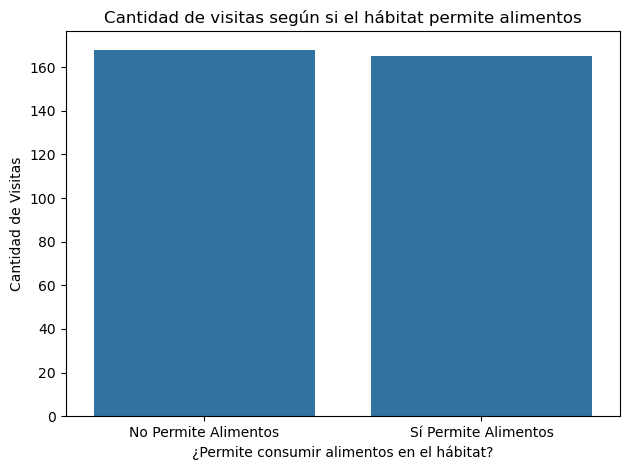

In [16]:
# Pregunta 7: ¿La posibilidad de consumir alimentos dentro de los hábitats influye en la cantidad de visitas?
print("\n--- Pregunta 7 ---")
left_join_entradas_habitats['permite_alimentos_str'] = left_join_entradas_habitats['permite_alimentos'].astype(str)

visitas_por_permiso_alimentos = left_join_entradas_habitats.groupby("permite_alimentos_str")["ID_entrada"].count().reset_index()
visitas_por_permiso_alimentos.columns = ["permite_alimentos", "cantidad_visitas"]

visitas_por_permiso_alimentos["permite_alimentos_label"] = visitas_por_permiso_alimentos["permite_alimentos"].map({
    'True': 'Sí Permite Alimentos',
    'False': 'No Permite Alimentos',
    'nan': 'No Especificado',
    'true': 'Sí Permite Alimentos',
    'false': 'No Permite Alimentos'
})


plt.figure()
sb.barplot(x="permite_alimentos_label", y="cantidad_visitas", data=visitas_por_permiso_alimentos)
plt.title("Cantidad de visitas según si el hábitat permite alimentos")
plt.xlabel("¿Permite consumir alimentos en el hábitat?")
plt.ylabel("Cantidad de Visitas")
plt.tight_layout()
print(visitas_por_permiso_alimentos[["permite_alimentos_label", "cantidad_visitas"]])

plt.show()

Los hábitats que No Permiten Alimentos recibieron 168 visitas, mientras que los que Sí Permiten Alimentos recibieron 165 visitas. La diferencia entre ambas categorías es mínima (solo 3 visitas).

Por lo que, se puede concluir que, la posibilidad de consumir alimentos dentro de los hábitats no parece influir de manera significativa en la cantidad de visitas que reciben.

### Pregunta 8: ¿Existe una correlación entre el porcentaje de cupos ocupados en los shows y el nivel de satisfacción de los visitantes?
Se calculó el porcentaje de ocupación de cada show al que asistió un visitante y se comparó con el nivel de satisfacción reportado por ese visitante. Luego, se calculó el coeficiente de correlación entre estas dos variables.


--- Pregunta 8 ---
Correlación entre porcentaje de ocupación y satisfacción: -0.03


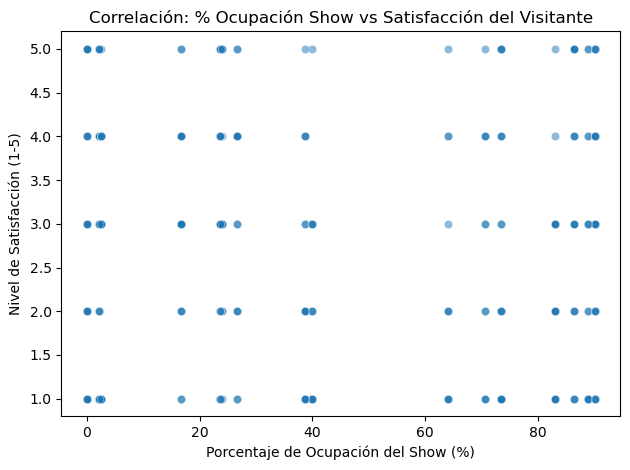

In [17]:
# Pregunta 8: ¿Existe una correlación entre el porcentaje de cupos ocupados en los shows y el nivel de satisfacción de los visitantes?
print("\n--- Pregunta 8 ---")
merged_shows_satisfaccion = pd.merge(entradas_shows, shows, on="ID_show", how="left")

# Calcular porcentaje de ocupación (with NumPy np.where)
merged_shows_satisfaccion["porcentaje_ocupacion"] = np.where(
    merged_shows_satisfaccion["cupos_totales"] > 0,  # Condición
    (merged_shows_satisfaccion["cupos_ocupados"] / merged_shows_satisfaccion["cupos_totales"]) * 100,  # Valor si True
    0.0  # Valor si False (o si cupos_totales es 0 o NaN, ya que la condición sera False)
)

data_q8 = merged_shows_satisfaccion.dropna(subset=['satisfaccion', 'porcentaje_ocupacion'])

plt.figure()
sb.scatterplot(x="porcentaje_ocupacion", y="satisfaccion", data=data_q8, alpha=0.5)
plt.title("Correlación: % Ocupación Show vs Satisfacción del Visitante")
plt.xlabel("Porcentaje de Ocupación del Show (%)")
plt.ylabel("Nivel de Satisfacción (1-5)")
plt.tight_layout()

correlation_q8 = data_q8["porcentaje_ocupacion"].corr(data_q8["satisfaccion"])
print(f"Correlación entre porcentaje de ocupación y satisfacción: {correlation_q8:.2f}")

plt.show()

El coeficiente de correlación obtenido es de -0.03. Este valor es tan cercano a cero que se puede concluir una correlación lineal prácticamente nula o despreciable.

Por lo tanto, esto significa que NO existe una relación lineal significativa entre el porcentaje de cupos ocupados en los shows y el nivel de satisfacción de los visitantes.

### Pregunta 9: ¿Existe una correlación entre el tipo de entrada (VIP) y el nivel de satisfacción de los visitantes?

Para esto, se calculó el coeficiente de correlación punto biserial entre el tipo de entrada (considerando VIP como una categoría) y la satisfacción.


--- Pregunta 9 ---
Correlación (punto biserial) entre entrada VIP y satisfacción en hábitats: 0.02


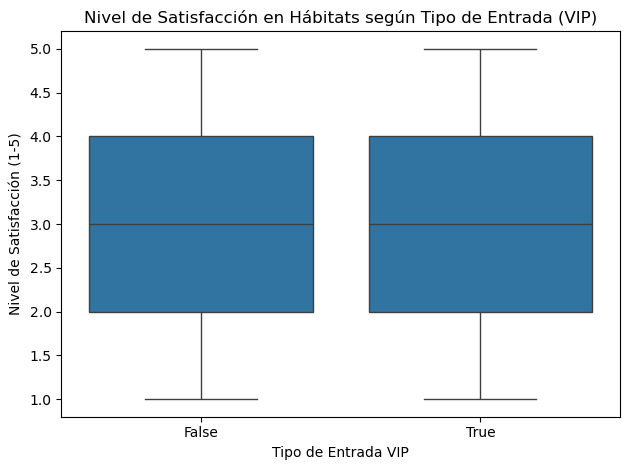

In [5]:
# Pregunta 9: ¿Existe una correlación entre el tipo de entrada (VIP) y el nivel de satisfacción de los visitantes?
print("\n--- Pregunta 9 ---")
merged_vip_satisfaccion_habitat = pd.merge(entradas_habitats, entradas[['ID_entrada', 'VIP']], on="ID_entrada", how="left")

# Convertir VIP a numérico para correlación (ej: True/1, False/0)
# Esto maneja booleanos, strings 'Si'/'No', 'True'/'False', y numéricos 0/1
if merged_vip_satisfaccion_habitat['VIP'].dtype == 'bool':
    merged_vip_satisfaccion_habitat['VIP_numeric'] = merged_vip_satisfaccion_habitat['VIP'].astype(int)
else:  # Si no es booleano, convierte a string para mapeo consistente
    merged_vip_satisfaccion_habitat['VIP_str'] = merged_vip_satisfaccion_habitat['VIP'].astype(str).str.lower()
    vip_map = {'true': 1, 'false': 0, 'si': 1, 'no': 0, '1': 1, '0': 0, '1.0': 1, '0.0': 0}
    merged_vip_satisfaccion_habitat['VIP_numeric'] = merged_vip_satisfaccion_habitat['VIP_str'].map(vip_map)

data_q9 = merged_vip_satisfaccion_habitat.dropna(subset=['satisfaccion', 'VIP_numeric'])

plt.figure()
sb.boxplot(x="VIP", y="satisfaccion", data=data_q9)  # Usa la columna VIP original para etiquetas del boxplot
plt.title("Nivel de Satisfacción en Hábitats según Tipo de Entrada (VIP)")
plt.xlabel("Tipo de Entrada VIP")
plt.ylabel("Nivel de Satisfacción (1-5)")
plt.tight_layout()

correlation_q9 = data_q9["VIP_numeric"].corr(data_q9["satisfaccion"])
print(f"Correlación (punto biserial) entre entrada VIP y satisfacción en hábitats: {correlation_q9:.2f}")

plt.show()

El coeficiente de correlación punto biserial resultante es de 0.02. Este valor, al igual que en la pregunta anterior, es muy cercano a cero, lo que indica una ausencia de correlación lineal fuerte.

Según estos datos, no existe una correlación lineal relevante entre poseer una entrada VIP y el nivel de satisfacción general de los visitantes en los hábitats.

### Pregunta 10: ¿La adquisición de entradas VIP se relaciona con la asistencia a shows?
Aquí, se cruzó la información de los tipos de entrada (VIP o no VIP) con el registro de asistencia a los shows, generando una tabla de contingencia.


--- Pregunta 10 ---
Tabla de contingencia VIP vs Asistencia a Shows:
asistio_show  False  True 
VIP                       
False            36    109
True             44     84


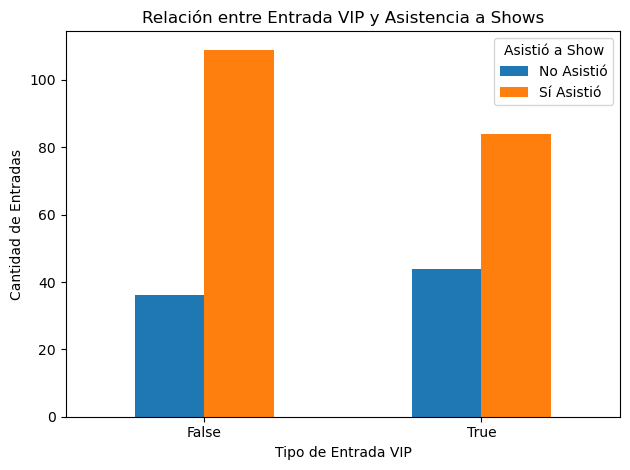

In [6]:
# Pregunta 10: ¿La adquisición de entradas VIP se relaciona con la asistencia a shows?
print("\n--- Pregunta 10 ---")
ids_asistieron_shows = entradas_shows["ID_entrada"].unique()
entradas_con_asistencia = entradas.copy()  # Trabaja sobre una copia
entradas_con_asistencia["asistio_show"] = entradas_con_asistencia["ID_entrada"].isin(ids_asistieron_shows)

contingency_table_q10 = pd.crosstab(entradas_con_asistencia["VIP"], entradas_con_asistencia["asistio_show"])
print("Tabla de contingencia VIP vs Asistencia a Shows:")
print(contingency_table_q10)

contingency_table_q10.plot(kind='bar', stacked=False)
plt.title("Relación entre Entrada VIP y Asistencia a Shows")
plt.xlabel("Tipo de Entrada VIP")
plt.ylabel("Cantidad de Entradas")
plt.xticks(rotation=0)
plt.legend(title="Asistió a Show", labels=["No Asistió", "Sí Asistió"])
plt.tight_layout()

plt.show()

 Se puede observar que, un porcentaje mayor de visitantes con entradas estándar (75.17%) asistió a los shows en comparación con los visitantes con entradas VIP (65.62%). Esto podría indicar que la adquisición de una entrada VIP no necesariamente se relaciona con una mayor asistencia a shows.

### Pregunta 11: ¿Existe una correlación entre la cantidad de especies en un hábitat y el número de visitas anuales?
Se investigó si los hábitats con un mayor número de especies tienden a atraer más visitantes anualmente. Para ello, se calculó el coeficiente de correlación entre la cantidad de especies de cada hábitat y el total de visitas que recibió.


--- Pregunta 11 ---
Correlación entre cantidad de especies y número de visitas: -0.27

Datos usados para el gráfico de Q11 (especies vs visitas):
                nombre_habitat  cantidad_especies  numero_visitas
0               Selva Tropical                  2              12
1                Sabana Dorada                  1              45
2   Caverna de los Murciélagos                  4              25
3           Pantano Misterioso                  4              11
4              Bosque Templado                  4              16
5       Rincón de los Reptiles                  2              20
6                Altas Cumbres                  3              16
7              Mares Profundos                  2              10
8         Isla de los Primates                  2              10
9              Valle del Tigre                  3               6
10              Estepa Salvaje                  2              14
11           Refugio del Panda                  4            

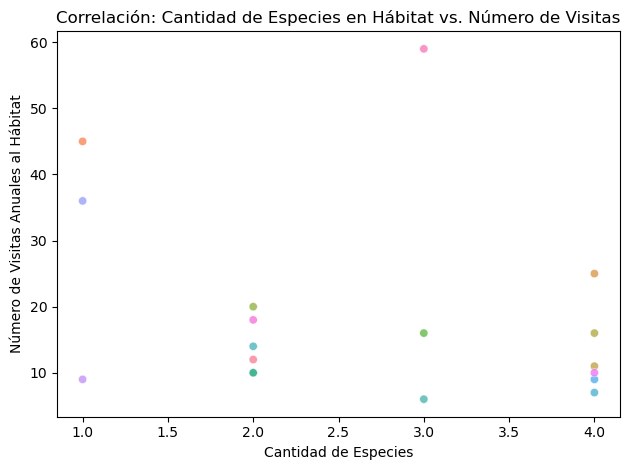

In [7]:
# Pregunta 11: ¿Existe una correlación entre la cantidad de especies en un hábitat y el número de visitas anuales?
print("\n--- Pregunta 11 ---")
visitas_por_habitat = entradas_habitats.groupby("ID_habitat")["ID_entrada"].count().reset_index()
visitas_por_habitat.rename(columns={"ID_entrada": "numero_visitas"}, inplace=True)

merged_especies_visitas = pd.merge(visitas_por_habitat, habitats[["ID_habitat", "cantidad_especies", "nombre_habitat"]], on="ID_habitat", how="left")

data_q11 = merged_especies_visitas.dropna(subset=['numero_visitas', 'cantidad_especies'])

plt.figure()
sb.scatterplot(x="cantidad_especies", y="numero_visitas", data=data_q11, hue="nombre_habitat", legend=False, alpha=0.7)
plt.title("Correlación: Cantidad de Especies en Hábitat vs. Número de Visitas")
plt.xlabel("Cantidad de Especies")
plt.ylabel("Número de Visitas Anuales al Hábitat")
plt.tight_layout()

correlation_q11 = data_q11["cantidad_especies"].corr(data_q11["numero_visitas"])
print(f"Correlación entre cantidad de especies y número de visitas: {correlation_q11:.2f}")
print("\nDatos usados para el gráfico de Q11 (especies vs visitas):")
print(data_q11[["nombre_habitat", "cantidad_especies", "numero_visitas"]])

plt.show()

El coeficiente de correlación obtenido es de -0.27. Este valor indica una correlación lineal negativa débil.
Esto sugiere que existe una leve tendencia a que los hábitats con más especies reciban un número ligeramente menor de visitas anuales, o viceversa.